In [84]:
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
import datetime

# Overview Section

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?

Ho - The Network latency of the current isp has decreased or stayed the same as our previous isp

Ha - The Network latency of our current isp has increased from our previous isp

True positive - the new isp has increased latency which is proven by the the data and Ho, with a p-value is less then our alpha. p-value(less than 5%)

True negative - the new isp has decreased latency which is proven by the data and Ho, with a p-value greater then our alpha

False positive(type 1 error) - The data states that the latency has increased, when the case was that the current isp's latency had actually decreased or stayed the same, disproving a hypothosis that was actually true. we rejected our null when it was actually true.

False Negative(type 2 error) - The data states that the latency has decreased or stayed the same, when the case was that the current isp's latency had actually increased proving a fake hypotosis because this was not actually the case. we accepted our null when it was actually false.

variables = Network latency(continuous), internet service providers (categorical)

### Is the website redesign any good?


### my rewording:  Has the website traffic increased since we redisigned?


Ho - The website traffic has seen a decrease or no change since it was redisigned.

Ha - The website traffic has seen an increase since it was redisigned.

True positive - The website has seen an increase in traffic, having a p-value greater than alpha and the null hypotosis is indeed incorrect. p-value(less than 5%)

True negative - the website has seen a decrease in traffic, having a p-value less than our alpha and the null hypothosis is in reality correct. p-value(greater than 5%)

False positive(type 1 error) - The websites data says that there has been an increase although in reality the truth is that the websites traffic has decreased or had no change. we rejected our null when it was actually true.

False negative(type 2 error) -  The websites data says that there has been a decrease, or had no change although in reality the truth is that the websites traffic has increased
we accepted our null when it was actually false.

### Is our television ad driving more sales?

### my rewording: have we had an increase in sales since we ran the television ad?

Ho - the sales decreased or stayed the same after running the advertisment

Ha - The sales increase after running the advertisment

True positive - The sales increase after the advertisment, having a p-value greater than alpha and the null hypotosis is in reality incorrect. p-value(less than 5%)

True negative - The sales decrease or say the same after the advertisment, having a p-value less than our alpha and the null hypothosis is in reality correct. p-value(greater than 5%)

False positive(type 1 error) - The sales seem to increase when in reality they have decreased or stayed the same. we rejected our null when it was actually true.

False negative(type 2 error) - The sales seem to decrease or stay the same when in reality they have actually increased. we accepted our null when it was actually false.

# T-Test Section

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

#### $H_{O}$: mean of time it takes to sell a home in office #1 == time it takes to sell a home in office #2
#### $H_{a}$: mean of time it takes to sell a home in office #1 != time it takes to sell a home in office #2

In [85]:
n_simulations = 40
alpha = .05
office_1 = np.random.normal(loc = 90, scale = 15,size = (n_simulations))
office_2 = np.random.normal(loc = 100, scale = 20,size = (50))

In [86]:
office_1

array([ 84.57301494, 103.52116281,  71.41479002,  76.64962483,
        98.57733903,  76.74372989,  79.6555595 ,  93.78392024,
        47.18748617,  75.45424537,  78.13908661, 113.74624382,
        84.76953528, 103.09805833, 105.75413208,  82.3553193 ,
        88.75235371,  86.99755114, 103.38616683,  72.08964789,
       107.23412575,  96.14896794,  84.01215645,  94.34418463,
        85.44196446, 111.42077767,  81.64495772, 103.31138913,
        70.5206728 , 101.65446096,  77.42161458, 106.38185773,
        87.53814395,  87.76132533,  90.40850025,  94.18826439,
       105.01853909, 107.31723597, 123.38118815,  79.59992186])

In [87]:
stats.mannwhitneyu(office_1,office_2)

MannwhitneyuResult(statistic=717.0, pvalue=0.010898288651826134)

In [88]:
t, p = stats.ttest_ind(office_1,office_2,equal_var = False)

In [89]:
t,p

(-2.858082395974225, 0.005320025043493861)

In [90]:
p < alpha

True

we can reject the $H_{0}$ because our p-value is statistically significant

## Load the mpg dataset and use it to answer the following questions:

In [91]:
df = data("mpg")

In [92]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [93]:
df.year.unique()

array([1999, 2008])

In [94]:
df = df.assign(average_mileage = (df.cty + df.hwy) / 2)

### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

#### $H_{O}$: mean amount of fuel efficiency of cars in 2008 == mean amount of fuel efficiency of cars in 1999
#### $H_{a}$: mean amount of fuel efficiency of cars in 2008 != mean amount of fuel efficiency of cars in 1999

In [95]:
cars_2008 = df[df.year == 2008].average_mileage
cars_1999 = df[df.year == 1999].average_mileage

In [96]:
cars_2008.var()

24.097480106100797

<AxesSubplot:>

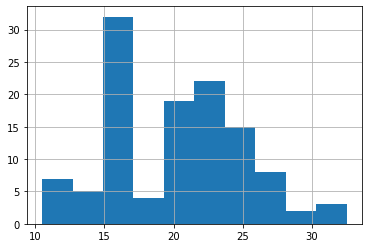

In [97]:
cars_2008.hist()

In [98]:
cars_1999.var()

27.122605363984682

<AxesSubplot:>

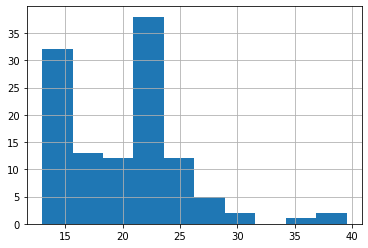

In [99]:
cars_1999.hist()

In [100]:
t, p = stats.ttest_ind(cars_2008,cars_1999,equal_var = True)

In [101]:
t,p

(-0.21960177245940962, 0.8263744040323578)

In [102]:
p < alpha

False

We failed to reject our $H_{O}$ and have a P-value < alpha

### Are compact cars more fuel-efficient than the average car?

#### $H_{O}$: compact cars fuel efficency <= the average cars fuel efficency
#### $H_{a}$: compact cars fuel efficency > the average cars fuel efficency

In [103]:
compact_cars = df[df["class"] == "compact"].average_mileage
all_cars = df.average_mileage.mean()

In [104]:
compact_cars.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: average_mileage, dtype: float64

In [105]:
all_cars

20.14957264957265

In [106]:
compact_cars.var()

12.442876965772433

In [107]:
compact_cars.mean()

24.21276595744681

<AxesSubplot:>

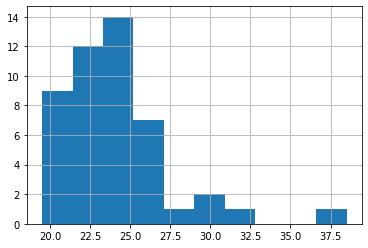

In [108]:
compact_cars.hist()

In [109]:
t, p = stats.ttest_1samp(compact_cars,all_cars)

In [110]:
p < alpha

True

In [111]:
t,p

(7.896888573132535, 4.1985637943171336e-10)

We rejected our $H_{O}$ , our p-value was less than alpha, and it seems that compact cars are more fuel efficent than the average car, as seen by the positive t-value

### Do manual cars get better gas mileage than automatic cars?

#### $H_{O}$: mean gas mileage in manual cars <= mean gas mileage of automatic cars
#### $H_{a}$: mean gas mileage in manual cars > mean gas mileage of automatic cars

In [112]:
#mpg[mpg.trans.str.contains("auto")}].average_mileage
#mpg[mpg.trans.str.contains("manual")}].average_mileage

In [113]:
df["is_automatic"] = np.where((df["trans"] == "manual(m5)") | (df["trans"] == "manual(m6)"), False, True)

In [114]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True


In [115]:
auto_cars = df[df.is_automatic == True].average_mileage
manual_cars = df[df.is_automatic == False].average_mileage

In [116]:
auto_cars.head()

1    23.5
4    25.5
5    21.0
7    22.5
9    20.5
Name: average_mileage, dtype: float64

In [117]:
auto_cars.mean()

19.130573248407643

<AxesSubplot:>

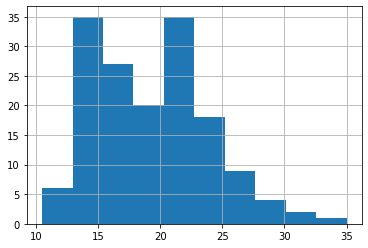

In [118]:
auto_cars.hist()

In [119]:
manual_cars.mean()

22.227272727272727

<AxesSubplot:>

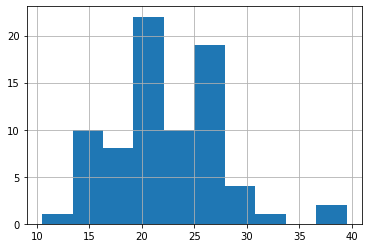

In [120]:
manual_cars.hist()

In [121]:
manual_cars.var()

26.635167464114826

In [122]:
t, p = stats.ttest_ind(manual_cars,auto_cars)

In [123]:
p/2 < alpha

True

In [124]:
t,p

(4.593437735750014, 7.154374401145683e-06)

In [125]:
#levene's test this helps test varience

#### $H_{O}$: population var is equal
#### $H_{a}$: populations var is not equal

In [126]:
stats.levene(auto_cars,manual_cars)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [127]:
if p/2 > alpha:
    print("we fail to reject the $H_{O}$")
elif t < 0:
    print("we fail to reject the $H_{O}$")
else:
    print("we reject the $H_{O}$, the mean of manual gas milage is greater than that of the automatic cars")

we reject the $H_{O}$, the mean of manual gas milage is greater than that of the automatic cars


we rejected our $H_{O}$

# Correlation Section

### 1. Use the telco_churn data.

In [128]:
df = pd.read_csv("Cust_Churn_Telco_New.csv")

In [129]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [130]:
df = df.dropna()

In [131]:
len(df)

7032

### Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

### hypothesis for tenure and monthly charges for all customers
#### $H_{O}$: there is no correlation between tenure and monthly charges
#### $H_{a}$: there is a correlation between tenure and monthly charges

### hypothesis for tenure and total charges for all customers
#### $H_{O}$: there is no correlation between tenure and total charges
#### $H_{a}$: there is a correlation between tenure and total charges

### hypothesis for tenure and monthly charges for phone customers
#### $H_{O}$: there is no correlation between tenure and monthly charges for phone users
#### $H_{a}$: there is a correlation between tenure and monthly charges for phone users

### hypothesis for tenure and total charges for phone customers
#### $H_{O}$: there is no correlation between tenure and monthly charges for phone users
#### $H_{a}$: there is a correlation between tenure and monthly charges for phone users

### hypothesis for tenure and monthly charges for internet customers
#### $H_{O}$: there is no correlation between tenure and monthly charges for internet users
#### $H_{a}$: there is a correlation between tenure and monthly charges for internet users

### hypothesis for tenure and total charges for internet customers
#### $H_{O}$: there is no correlation between tenure and monthly charges for internet users
#### $H_{a}$: there is a correlation between tenure and monthly charges for internet users

In [132]:
"\u03B1"

'α'

In [133]:
df["telecom_setup"] = df.InternetService + " " + df.MultipleLines

<ipython-input-133-b7850c9c98ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["telecom_setup"] = df.InternetService + " " + df.MultipleLines


In [134]:
df.telecom_setup.unique()

array(['DSL No phone service', 'DSL No', 'Fiber optic No',
       'Fiber optic Yes', 'No No', 'DSL Yes', 'No Yes'], dtype=object)

In [135]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,telecom_setup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,DSL No phone service
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,DSL No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,DSL No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,DSL No phone service
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Fiber optic No


In [136]:
options = df.telecom_setup.value_counts().index

In [137]:
def correlation_test(x,y):
    message = ""
    corr, p = stats.pearsonr(x,y)
    
    if p < alpha:
        message = "we reject the null hypothesis. There is evidence that supports a linear correlation"
    else:
        message = "we fail to reject the null hypothesis that there is no correlation"
        
    return corr,p,message

In [138]:
output = []

for option in options:
    subset = df[df.telecom_setup == option]
    corr , p , message = correlation_test(subset.tenure,subset.MonthlyCharges)
    result = {
        "option":option,
        "corr":corr,
        "p":p,
        "message":message
    }
    output.append(result)
print("correlation test for tenure vs. monthly_charges, controling for Internet/Phone service")
pd.DataFrame(output)

correlation test for tenure vs. monthly_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber optic Yes,0.573212,1.083568e-169,we reject the null hypothesis. There is evidence that supports a linear correlation
1,No No,-0.012140,6.769684e-01,we fail to reject the null hypothesis that there is no correlation
2,Fiber optic No,0.528906,1.881036e-84,we reject the null hypothesis. There is evidence that supports a linear correlation
3,DSL No,0.562023,3.174262e-88,we reject the null hypothesis. There is evidence that supports a linear correlation
4,DSL Yes,0.609170,3.258127e-71,we reject the null hypothesis. There is evidence that supports a linear correlation
5,DSL No phone service,0.592430,1.173274e-65,we reject the null hypothesis. There is evidence that supports a linear correlation
6,No Yes,-0.033216,5.416047e-01,we fail to reject the null hypothesis that there is no correlation


In [139]:
α = 0.05

In [140]:
phone = df[df.PhoneService == "Yes"]

In [141]:
phone.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,telecom_setup
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,DSL No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,DSL No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Fiber optic No
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Fiber optic Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,Fiber optic Yes


In [142]:
internet = df[df.InternetService != "No"]

In [143]:
internet.sample(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,telecom_setup
1706,0727-BNRLG,Male,0,No,No,69,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Two year,Yes,Credit card (automatic),97.65,6743.55,No,Fiber optic Yes
1968,5447-WZAFP,Female,0,No,No,53,Yes,No,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Mailed check,100.30,5200.80,No,Fiber optic No
2901,7765-LWVVH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Two year,Yes,Electronic check,95.10,6843.15,No,Fiber optic Yes
874,4713-ZBURT,Male,0,No,Yes,45,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Two year,No,Bank transfer (automatic),99.70,4634.35,No,Fiber optic Yes
6579,3938-YFPXD,Male,0,No,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.30,5997.10,No,DSL Yes
4984,5236-XMZJY,Female,0,No,No,42,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,No,Bank transfer (automatic),59.65,2536.55,No,DSL No
5805,1697-NVVGY,Male,1,Yes,No,19,Yes,No,DSL,Yes,...,No,Yes,No,Month-to-month,No,Bank transfer (automatic),66.40,1286.05,No,DSL No


In [144]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

In [145]:
df.MonthlyCharges.unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [146]:
r,p = stats.pearsonr(df.tenure,df.MonthlyCharges)

In [147]:
r,p

(0.24686176664089346, 3.9898213232673846e-98)

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

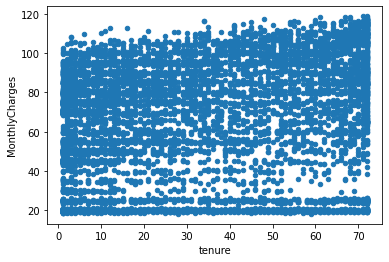

In [148]:
df.plot.scatter('tenure', 'MonthlyCharges')

In [149]:
print('Correlation between tenure and monthly charges')
print(f'r = {r:.3f}')
print(f'p = {p:.1f}')

Correlation between tenure and monthly charges
r = 0.247
p = 0.0


#### The p is low the $H_{O}$ must go

In [150]:
r,p = stats.pearsonr(df.tenure,df.TotalCharges)

In [151]:
r,p

(0.8258804609332018, 0.0)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

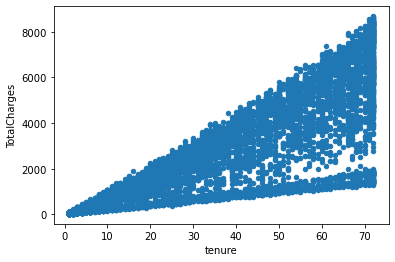

In [152]:
df.plot.scatter('tenure', 'TotalCharges')

In [153]:
print('Correlation between tenure and total charges')
print(f'r = {r:.3f}')
print(f'p = {p:.1f}')

Correlation between tenure and total charges
r = 0.826
p = 0.0


#### The p is low the $H_{O}$ must go

Checking relationship of only phone but they might have phone and internet

In [154]:
r,p = stats.pearsonr(phone.tenure,phone.MonthlyCharges)

In [155]:
r,p

(0.2441939657519323, 6.82801603762022e-87)

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

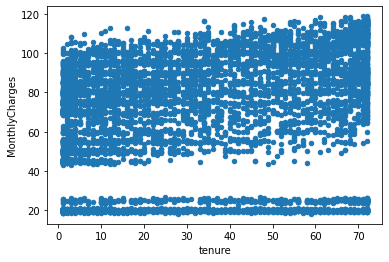

In [156]:
phone.plot.scatter('tenure', 'MonthlyCharges')

In [157]:
print('Correlation between tenure and monthly charges for phone')
print(f'r = {r:.3f}')
print(f'p = {p:.1f}')

Correlation between tenure and monthly charges for phone
r = 0.244
p = 0.0


#### The p is low the $H_{O}$ must go

In [158]:
r,p = stats.pearsonr(phone.tenure,phone.TotalCharges)

In [159]:
r,p

(0.8298393210699411, 0.0)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

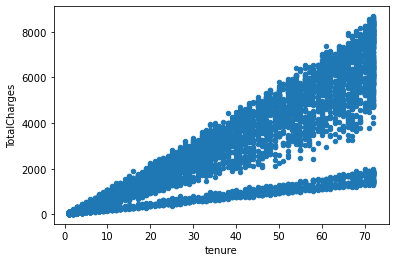

In [160]:
phone.plot.scatter('tenure', 'TotalCharges')

In [161]:
print('Correlation between tenure and total charges for phone')
print(f'r = {r:.3f}')
print(f'p = {p:.1f}')

Correlation between tenure and total charges for phone
r = 0.830
p = 0.0


#### The p is low the $H_{O}$ must go

Checking relationship of only internet but they might have phone and internet

In [162]:
r,p = stats.pearsonr(internet.tenure,internet.MonthlyCharges)

In [163]:
r,p

(0.3720391976133241, 1.6186841401711697e-180)

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

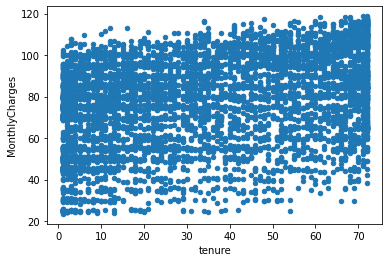

In [164]:
internet.plot.scatter('tenure', 'MonthlyCharges')

In [165]:
print('Correlation between tenure and monthly charges for internet')
print(f'r = {r:.3f}')
print(f'p = {p:.1f}')

Correlation between tenure and monthly charges for internet
r = 0.372
p = 0.0


#### The p is low the $H_{O}$ must go

In [166]:
r,p = stats.pearsonr(internet.tenure,internet.TotalCharges)

In [167]:
r,p

(0.9319346187418098, 0.0)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

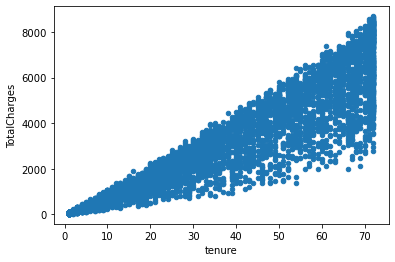

In [168]:
internet.plot.scatter('tenure', 'TotalCharges')

In [169]:
print('Correlation between tenure and total charges for internet')
print(f'r = {r:.3f}')
print(f'p = {p:.1f}')

Correlation between tenure and total charges for internet
r = 0.932
p = 0.0


#### The p is low the $H_{O}$ must go

### 2. Use the employees database.

In [170]:
from env import host, user, password

In [171]:
def get_db_url(user,password,host,database):
    return (f"mysql+pymysql://{user}:{password}@{host}/{database}")

In [172]:
url = get_db_url(user,password,host,database = "employees")

In [173]:
query = '''
SELECT employees.emp_no, hire_date, salary, to_date
FROM employees
JOIN salaries ON salaries.emp_no = employees.emp_no;
'''
df = pd.read_sql(query,url)
df.head()

,emp_no,hire_date,salary,to_date
0,10001,1986-06-26,60117,1987-06-26
1,10001,1986-06-26,62102,1988-06-25
2,10001,1986-06-26,66074,1989-06-25
3,10001,1986-06-26,66596,1990-06-25
4,10001,1986-06-26,66961,1991-06-25


### Is there a relationship between how long an employee has been with the company and their salary?

In [174]:
type(df["to_date"][0])

datetime.date

In [175]:
df['to_date'] = df["to_date"].astype("str")

In [176]:
df["fixed_date"] = df["to_date"].map(lambda x: x.replace("9999-01-01","2003-01-01"))

In [177]:
df.head()

,emp_no,hire_date,salary,to_date,fixed_date
0,10001,1986-06-26,60117,1987-06-26,1987-06-26
1,10001,1986-06-26,62102,1988-06-25,1988-06-25
2,10001,1986-06-26,66074,1989-06-25,1989-06-25
3,10001,1986-06-26,66596,1990-06-25,1990-06-25
4,10001,1986-06-26,66961,1991-06-25,1991-06-25


In [178]:
df["fixed_date"] = pd.to_datetime(df.fixed_date)

In [179]:
df["fixed_hire_date"] = pd.to_datetime(df.hire_date)

In [180]:
df["tenure"] = df["fixed_date"] - df["fixed_hire_date"]

In [181]:
df.dtypes

emp_no                       int64
hire_date                   object
salary                       int64
to_date                     object
fixed_date          datetime64[ns]
fixed_hire_date     datetime64[ns]
tenure             timedelta64[ns]
dtype: object

In [182]:
df.head(10)

,emp_no,hire_date,salary,to_date,fixed_date,fixed_hire_date,tenure
0,10001,1986-06-26,60117,1987-06-26,1987-06-26,1986-06-26,365 days
1,10001,1986-06-26,62102,1988-06-25,1988-06-25,1986-06-26,730 days
2,10001,1986-06-26,66074,1989-06-25,1989-06-25,1986-06-26,1095 days
3,10001,1986-06-26,66596,1990-06-25,1990-06-25,1986-06-26,1460 days
4,10001,1986-06-26,66961,1991-06-25,1991-06-25,1986-06-26,1825 days
5,10001,1986-06-26,71046,1992-06-24,1992-06-24,1986-06-26,2190 days
6,10001,1986-06-26,74333,1993-06-24,1993-06-24,1986-06-26,2555 days
7,10001,1986-06-26,75286,1994-06-24,1994-06-24,1986-06-26,2920 days
8,10001,1986-06-26,75994,1995-06-24,1995-06-24,1986-06-26,3285 days
9,10001,1986-06-26,76884,1996-06-23,1996-06-23,1986-06-26,3650 days


In [183]:
df["fixed_tenure"] = df["tenure"].dt.days

In [184]:
df.head()

,emp_no,hire_date,salary,to_date,fixed_date,fixed_hire_date,tenure,fixed_tenure
0,10001,1986-06-26,60117,1987-06-26,1987-06-26,1986-06-26,365 days,365
1,10001,1986-06-26,62102,1988-06-25,1988-06-25,1986-06-26,730 days,730
2,10001,1986-06-26,66074,1989-06-25,1989-06-25,1986-06-26,1095 days,1095
3,10001,1986-06-26,66596,1990-06-25,1990-06-25,1986-06-26,1460 days,1460
4,10001,1986-06-26,66961,1991-06-25,1991-06-25,1986-06-26,1825 days,1825


In [185]:
df.dtypes

emp_no                       int64
hire_date                   object
salary                       int64
to_date                     object
fixed_date          datetime64[ns]
fixed_hire_date     datetime64[ns]
tenure             timedelta64[ns]
fixed_tenure                 int64
dtype: object

In [186]:
r,p = stats.pearsonr(df.fixed_tenure,df.salary)

In [187]:
r,p

(0.38322871912900836, 0.0)

We can reject the null hypothesis because of the low p value

<AxesSubplot:xlabel='fixed_tenure', ylabel='salary'>

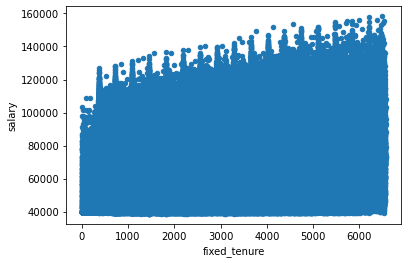

In [188]:
df.plot.scatter('fixed_tenure', 'salary')

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [189]:
query = '''
SELECT employees.emp_no,hire_date, title, to_date
FROM employees
JOIN titles ON titles.emp_no = employees.emp_no;
'''
df = pd.read_sql(query,url)
df.head()

,emp_no,hire_date,title,to_date
0,10001,1986-06-26,Senior Engineer,9999-01-01
1,10002,1985-11-21,Staff,9999-01-01
2,10003,1986-08-28,Senior Engineer,9999-01-01
3,10004,1986-12-01,Engineer,1995-12-01
4,10004,1986-12-01,Senior Engineer,9999-01-01


In [190]:
title_count = df.groupby(["emp_no"]).count()

In [191]:
title_count.reset_index()

,emp_no,hire_date,title,to_date
0,10001,1,1,1
1,10002,1,1,1
2,10003,1,1,1
3,10004,2,2,2
4,10005,2,2,2
...,...,...,...,...
300019,499995,1,1,1
300020,499996,2,2,2
300021,499997,2,2,2
300022,499998,2,2,2


In [192]:
title_count = title_count.rename(columns = {"hire_date": "x", "title":"title_count","to_date":"y"})

In [193]:
title_count = title_count.reset_index()

In [194]:
title_count.head()

,emp_no,x,title_count,y
0,10001,1,1,1
1,10002,1,1,1
2,10003,1,1,1
3,10004,2,2,2
4,10005,2,2,2


In [195]:
df = df.merge(title_count, how = "outer", on = "emp_no")

In [196]:
df = df.drop(columns = "y")

In [197]:
df = df.drop(columns = "x")

In [198]:
df.head()

,emp_no,hire_date,title,to_date,title_count
0,10001,1986-06-26,Senior Engineer,9999-01-01,1
1,10002,1985-11-21,Staff,9999-01-01,1
2,10003,1986-08-28,Senior Engineer,9999-01-01,1
3,10004,1986-12-01,Engineer,1995-12-01,2
4,10004,1986-12-01,Senior Engineer,9999-01-01,2


In [199]:
df['to_date'] = df["to_date"].astype("str")

In [200]:
df["fixed_date"] = df["to_date"].map(lambda x: x.replace("9999-01-01","2003-01-01"))

In [201]:
df["fixed_date"] = pd.to_datetime(df.fixed_date)

In [202]:
df["fixed_hire_date"] = pd.to_datetime(df.hire_date)

In [203]:
df["tenure"] = df["fixed_date"] - df["fixed_hire_date"]

In [204]:
df["fixed_tenure"] = df["tenure"].dt.days

In [205]:
df.head(10)

,emp_no,hire_date,title,to_date,title_count,fixed_date,fixed_hire_date,tenure,fixed_tenure
0,10001,1986-06-26,Senior Engineer,9999-01-01,1,2003-01-01,1986-06-26,6033 days,6033
1,10002,1985-11-21,Staff,9999-01-01,1,2003-01-01,1985-11-21,6250 days,6250
2,10003,1986-08-28,Senior Engineer,9999-01-01,1,2003-01-01,1986-08-28,5970 days,5970
3,10004,1986-12-01,Engineer,1995-12-01,2,1995-12-01,1986-12-01,3287 days,3287
4,10004,1986-12-01,Senior Engineer,9999-01-01,2,2003-01-01,1986-12-01,5875 days,5875
5,10005,1989-09-12,Senior Staff,9999-01-01,2,2003-01-01,1989-09-12,4859 days,4859
6,10005,1989-09-12,Staff,1996-09-12,2,1996-09-12,1989-09-12,2557 days,2557
7,10006,1989-06-02,Senior Engineer,9999-01-01,1,2003-01-01,1989-06-02,4961 days,4961
8,10007,1989-02-10,Senior Staff,9999-01-01,2,2003-01-01,1989-02-10,5073 days,5073
9,10007,1989-02-10,Staff,1996-02-11,2,1996-02-11,1989-02-10,2557 days,2557


In [206]:
r,p = stats.pearsonr(df.fixed_tenure,df.title_count)

In [207]:
r,p

(0.06715112483279831, 0.0)

We can reject the null hypothesis because of the low p value

<AxesSubplot:xlabel='fixed_tenure', ylabel='title_count'>

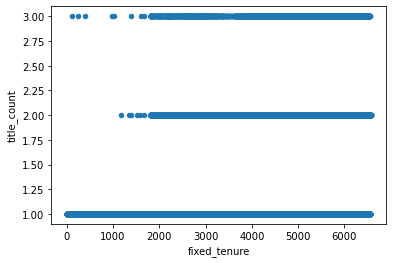

In [208]:
df.plot.scatter('fixed_tenure', 'title_count')

In [ ]:
df.plot.bar("fixed_tenure","title_count")

### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [ ]:
df = data("sleepstudy")

In [ ]:
data("sleepstudy", show_doc = True)

### hypothesis for the relationship between days and reaction time
#### $H_{O}$: there is no correlation between the number of days with restricted sleep in the study and reaction time
#### $H_{a}$: there is a correlation between the number of days with restricted sleep in the study and reaction time

In [ ]:
df.head()

In [ ]:
r,p = stats.pearsonr(df.Days,df.Reaction)

In [ ]:
r,p

In [ ]:
df.plot.scatter('Days', 'Reaction')

In [ ]:
print('Correlation between tenure and total charges for internet')
print(f'r = {r:.3f}')
print(f'p = {p:.1f}')